# Creating a part manual part automatic evaluation dataset

## Creating a random question type vector

In [2]:
import pandas as pd

In [12]:
question_types = ['"what"', 
                  'multiple-choice', 
                  '"yes/no"', 
                  '"which"',
                  '"who"', 
                  '"how"',
                  "comparative",
                  "descriptive",
                  "open-ended",
                  "hypothetical"]

In [41]:
question_text = [[question_type,f"Scenario: Generate a meaningful and simple {question_type}-question for which an answer can be found in the following context. Pose the question like someone would enter a google query and not know the context. Also only ask one question at a time:"] for question_type in question_types]

In [42]:
question_text


[
    [
        '"what"',
        'Scenario: Generate a meaningful and simple "what"-question for which an answer can be found in the following context. Pose the question like someone would enter a google query and not know the context. Also only ask one question at a time:'
    ],
    [
        'multiple-choice',
        'Scenario: Generate a meaningful and simple multiple-choice-question for which an answer can be found in the following context. Pose the question like someone would enter a google query and not know the context. Also only ask one question at a time:'
    ],
    [
        '"yes/no"',
        'Scenario: Generate a meaningful and simple "yes/no"-question for which an answer can be found in the following context. Pose the question like someone would enter a google query and not know the context. Also only ask one question at a time:'
    ],
    [
        '"which"',
        'Scenario: Generate a meaningful and simple "which"-question for which an answer can be found in th

In [44]:
import random
random.seed(42)
random_questions = random.choices(question_text, k=60)

In [45]:
random_questions


[
    [
        'comparative',
        'Scenario: Generate a meaningful and simple comparative-question for which an answer can be found in the following context. Pose the question like someone would enter a google query and not know the context. Also only ask one question at a time:'
    ],
    [
        '"what"',
        'Scenario: Generate a meaningful and simple "what"-question for which an answer can be found in the following context. Pose the question like someone would enter a google query and not know the context. Also only ask one question at a time:'
    ],
    [
        '"yes/no"',
        'Scenario: Generate a meaningful and simple "yes/no"-question for which an answer can be found in the following context. Pose the question like someone would enter a google query and not know the context. Also only ask one question at a time:'
    ],
    [
        '"yes/no"',
        'Scenario: Generate a meaningful and simple "yes/no"-question for which an answer can be found in the foll

## Generating a list of random abstracts for which questions should created

In [23]:
abstract_df = pd.read_csv("data/01_raw/doc_embeddings.csv", usecols=['combined_doc'])
abstract_df.head()


,combined_doc
0,Title: Disorders of communication: dysarthria....
1,Title: Effectiveness of empathy in general pra...
2,Title: Incivility.\nAuthors: Catherine L Witt\...
3,Title: Transformative learning.\nAuthors: Patr...
4,Title: The cooperative brain.\nAuthors: Mirre ...


In [63]:
rand_abstract_question = abstract_df.sample(n=60, random_state=42)

In [66]:
import re
pattern = re.compile(r'Abstract:(.*?)(?:(?:\n\n)|(?:Journal:|$))', re.DOTALL)

def get_abstract(text): 
    match = pattern.search(text)
    if match: 
        abstract = match.group(1).strip()
    else: 
        abstract = "NA"
    return abstract

rand_abstract_question['abstract'] = rand_abstract_question['combined_doc'].apply(get_abstract)
rand_abstract_question['question_type'] = [question[0]for question in random_questions]
rand_abstract_question['part_prompt'] = [question[1]for question in random_questions]
rand_abstract_question['full_prompt'] = rand_abstract_question['part_prompt'].astype(str).str.cat(rand_abstract_question['abstract'].astype(str), sep=' ')
rand_abstract_question.head()

,combined_doc,abstract,question_type,question_text,part_prompt,full_prompt
130335,Title: Episodic memory in aspects of brain inf...,Cognitive functionality emerges due to neural ...,comparative,Scenario: Generate a meaningful and simple com...,Scenario: Generate a meaningful and simple com...,Scenario: Generate a meaningful and simple com...
150601,Title: A novel service robot assignment approa...,Coronavirus Disease-19 (COVID-19) is a major c...,"""what""","Scenario: Generate a meaningful and simple ""wh...","Scenario: Generate a meaningful and simple ""wh...","Scenario: Generate a meaningful and simple ""wh..."
67765,Title: Investigation of Plasma Activated Si-Si...,This paper presents a detection method for cha...,"""yes/no""","Scenario: Generate a meaningful and simple ""ye...","Scenario: Generate a meaningful and simple ""ye...","Scenario: Generate a meaningful and simple ""ye..."
69171,Title: Deep learning for vibrational spectral ...,The development of chemometrics aims to provid...,"""yes/no""","Scenario: Generate a meaningful and simple ""ye...","Scenario: Generate a meaningful and simple ""ye...","Scenario: Generate a meaningful and simple ""ye..."
162099,Title: Recognition of Postoperative Cystograph...,Purpose: Post-operative cystography has been u...,descriptive,Scenario: Generate a meaningful and simple des...,Scenario: Generate a meaningful and simple des...,Scenario: Generate a meaningful and simple des...


In [72]:
rand_abstract_question.to_csv("question_generation_prompts.csv", index=False)

# Note: LLM question generation was working poorly so the questions were created manually. They are no combined with a prompt such that the answer can be generated with an LLM

In [14]:
manual_questions = pd.read_csv("../data/08_reporting/manual_questions.csv")

In [22]:
answer_generation_prompt = [f"You are an AI assistant that answers questions using as few words as possible and only based on the following context: {abstract} Question: {question}" for question,abstract in zip(manual_questions['generated_question'], manual_questions['abstract'])]

In [23]:
manual_questions['answer_generation_prompt'] = answer_generation_prompt
manual_questions.head()

,combined_doc,abstract,question_type,question_text,part_prompt,full_prompt,generated_question,generated_answer,answer_generation_prompt
0,Title: Episodic memory in aspects of brain inf...,Cognitive functionality emerges due to neural ...,comparative,Scenario: Generate a meaningful and simple com...,Scenario: Generate a meaningful and simple com...,Scenario: Generate a meaningful and simple com...,How do resting-state functional connectivity a...,NaN,You are an AI assistant that answers questions...
1,Title: A novel service robot assignment approa...,Coronavirus Disease-19 (COVID-19) is a major c...,"""what""","Scenario: Generate a meaningful and simple ""wh...","Scenario: Generate a meaningful and simple ""wh...","Scenario: Generate a meaningful and simple ""wh...",What methods and frameworks are proposed for u...,NaN,You are an AI assistant that answers questions...
2,Title: Investigation of Plasma Activated Si-Si...,This paper presents a detection method for cha...,"""yes/no""","Scenario: Generate a meaningful and simple ""ye...","Scenario: Generate a meaningful and simple ""ye...","Scenario: Generate a meaningful and simple ""ye...",Are spatial processing methods such as median ...,NaN,You are an AI assistant that answers questions...
3,Title: Deep learning for vibrational spectral ...,The development of chemometrics aims to provid...,"""yes/no""","Scenario: Generate a meaningful and simple ""ye...","Scenario: Generate a meaningful and simple ""ye...","Scenario: Generate a meaningful and simple ""ye...",Did the application of neural networks receive...,NaN,You are an AI assistant that answers questions...
4,Title: Recognition of Postoperative Cystograph...,Purpose: Post-operative cystography has been u...,descriptive,Scenario: Generate a meaningful and simple des...,Scenario: Generate a meaningful and simple des...,Scenario: Generate a meaningful and simple des...,Describe what post-perative cystography is oft...,NaN,You are an AI assistant that answers questions...


In [24]:
manual_questions.to_csv("../data/08_reporting/answer_generation_prompts.csv", index=False)

In [69]:
sum(manual_questions["generated_question"]=="Na") + sum(manual_questions["generated_question"].isna())

6

In [73]:
manual_questions.loc[manual_questions["generated_question"]=="Na"]

,combined_doc,abstract,question_type,question_text,part_prompt,full_prompt,generated_question,generated_answer,answer_generation_prompt
40,Title: Internet health information education f...,This study aimed to develop internet health in...,descriptive,Scenario: Generate a meaningful and simple des...,Scenario: Generate a meaningful and simple des...,Scenario: Generate a meaningful and simple des...,Na,NaN,You are an AI assistant that answers questions...
46,Title: Elusive adenomyosis: a plea for an inte...,NaN,multiple-choice,Scenario: Generate a meaningful and simple mul...,Scenario: Generate a meaningful and simple mul...,Scenario: Generate a meaningful and simple mul...,Na,NaN,You are an AI assistant that answers questions...
48,Title: Effects of Proximate Analysis on Coal A...,The temperature at which coal ash melts has a ...,comparative,Scenario: Generate a meaningful and simple com...,Scenario: Generate a meaningful and simple com...,Scenario: Generate a meaningful and simple com...,Na,NaN,You are an AI assistant that answers questions...
59,Title: Online support networks: the kindness o...,"This month, David Anderson discusses the Faceb...","""which""","Scenario: Generate a meaningful and simple ""wh...","Scenario: Generate a meaningful and simple ""wh...","Scenario: Generate a meaningful and simple ""wh...",Na,NaN,You are an AI assistant that answers questions...


In [74]:
manual_questions.loc[manual_questions["generated_question"].isna()]

,combined_doc,abstract,question_type,question_text,part_prompt,full_prompt,generated_question,generated_answer,answer_generation_prompt
8,Title: Modular metamaterials composed of folda...,A new type of modular metamaterials with repro...,"""who""","Scenario: Generate a meaningful and simple ""wh...","Scenario: Generate a meaningful and simple ""wh...","Scenario: Generate a meaningful and simple ""wh...",NaN,NaN,You are an AI assistant that answers questions...
36,Title: Multi-responsive and conductive bilayer...,Multi-stimuli-responsive hydrogels are intelli...,open-ended,Scenario: Generate a meaningful and simple ope...,Scenario: Generate a meaningful and simple ope...,Scenario: Generate a meaningful and simple ope...,NaN,NaN,You are an AI assistant that answers questions...


In [96]:
import pandas as pd

# Drop the row with index 2 since question did not meet quality standards
#manual_questions.drop(index=2, inplace=True)
cleaned_questions = manual_questions.dropna(subset=['generated_question']) \
                                    .loc[manual_questions['generated_question'] != "Na"]

cleaned_questions


,combined_doc,abstract,question_type,question_text,part_prompt,full_prompt,generated_question,generated_answer,answer_generation_prompt
0,Title: Episodic memory in aspects of brain inf...,Cognitive functionality emerges due to neural ...,comparative,Scenario: Generate a meaningful and simple com...,Scenario: Generate a meaningful and simple com...,Scenario: Generate a meaningful and simple com...,How do resting-state functional connectivity a...,NaN,You are an AI assistant that answers questions...
3,Title: Deep learning for vibrational spectral ...,The development of chemometrics aims to provid...,"""yes/no""","Scenario: Generate a meaningful and simple ""ye...","Scenario: Generate a meaningful and simple ""ye...","Scenario: Generate a meaningful and simple ""ye...",Did the application of neural networks receive...,NaN,You are an AI assistant that answers questions...
4,Title: Recognition of Postoperative Cystograph...,Purpose: Post-operative cystography has been u...,descriptive,Scenario: Generate a meaningful and simple des...,Scenario: Generate a meaningful and simple des...,Scenario: Generate a meaningful and simple des...,Describe what post-perative cystography is oft...,NaN,You are an AI assistant that answers questions...
5,Title: Exploring the munchies: An online surve...,Cannabis intoxication is commonly reported to ...,comparative,Scenario: Generate a meaningful and simple com...,Scenario: Generate a meaningful and simple com...,Scenario: Generate a meaningful and simple com...,Are psychological changes that underly the the...,NaN,You are an AI assistant that answers questions...
6,Title: Prognostic profile of patients with non...,Various factors are associated with the progno...,open-ended,Scenario: Generate a meaningful and simple ope...,Scenario: Generate a meaningful and simple ope...,Scenario: Generate a meaningful and simple ope...,What are possible influental factors that dist...,NaN,You are an AI assistant that answers questions...
7,Title: Is There Really a Relationship Between ...,A strong relationship between empathy and aggr...,"""what""","Scenario: Generate a meaningful and simple ""wh...","Scenario: Generate a meaningful and simple ""wh...","Scenario: Generate a meaningful and simple ""wh...",What should intervention programs for aggressi...,NaN,You are an AI assistant that answers questions...
9,Title: Analysis of Emotional Stress of Teacher...,The construction direction of Japanese teachin...,"""what""","Scenario: Generate a meaningful and simple ""wh...","Scenario: Generate a meaningful and simple ""wh...","Scenario: Generate a meaningful and simple ""wh...",What components could be considered to underst...,NaN,You are an AI assistant that answers questions...
10,Title: Excitement-Seeking Gambling in Adolesce...,Motivational characteristics such as excitemen...,"""yes/no""","Scenario: Generate a meaningful and simple ""ye...","Scenario: Generate a meaningful and simple ""ye...","Scenario: Generate a meaningful and simple ""ye...",Do young people with a tendency towards excite...,NaN,You are an AI assistant that answers questions...
11,Title: Quantitative Evaluation of Task-Induced...,Electroencephalography (EEG) can access ischem...,"""how""","Scenario: Generate a meaningful and simple ""ho...","Scenario: Generate a meaningful and simple ""ho...","Scenario: Generate a meaningful and simple ""ho...",How could electroencephalography helpful in pr...,NaN,You are an AI assistant that answers questions...
12,Title: Ammons quick test validity among random...,"After selection using a random number table, f...","""what""","Scenario: Generate a meaningful and simple ""wh...","Scenario: Generate a meaningful and simple ""wh...","Scenario: Generate a meaningful and simple ""wh...",What is a reliable measure for verbal intellig...,NaN,You are an AI assistant that answers questions...


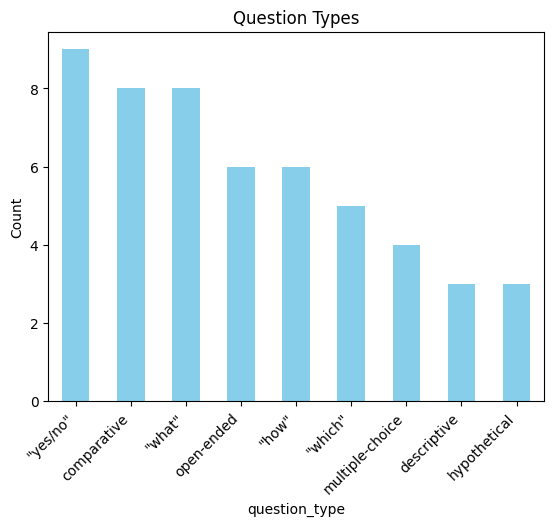

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

category_counts = cleaned_questions['question_type'].value_counts()
category_counts.plot(kind='bar', color='skyblue')
plt.title('Question Types')
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10) 


plt.show()


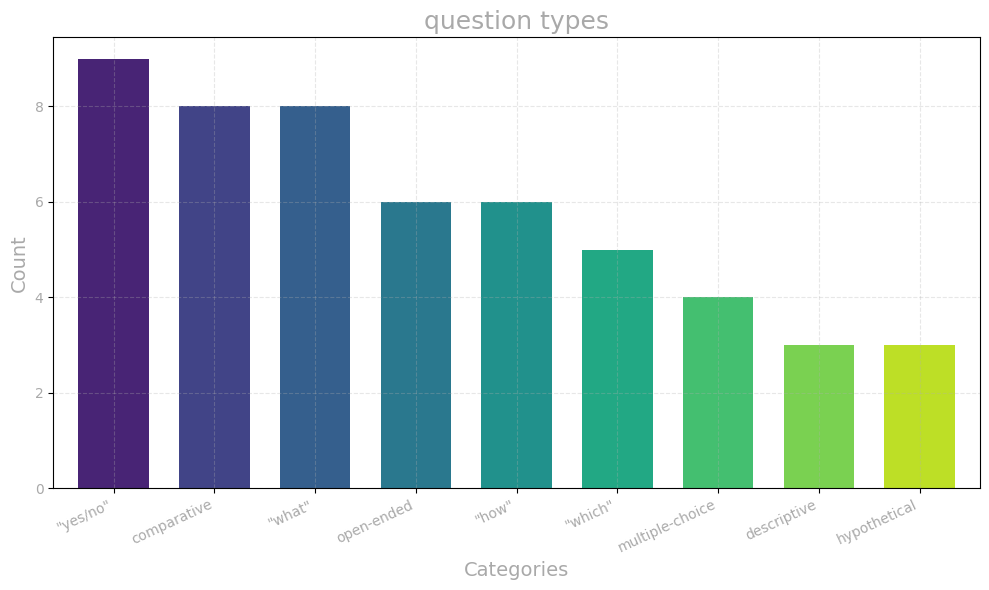

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("viridis", len(category_counts))
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar', color=colors, width=0.7)
plt.title('question types', fontsize=18, color='darkgray')
plt.xlabel('Categories', fontsize=14, color='darkgray')
plt.ylabel('Count', fontsize=14, color='darkgray')
plt.yticks(fontsize=10, color='darkgray')
plt.xticks(rotation=25, ha='right', fontsize=10, color='darkgray')  # Rotate x-axis ticks for better visibility
plt.grid(alpha=0.3, linestyle='--')

# Add a cool background color
plt.savefig('semiAutoQuestionTypes.png', transparent=True)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
